In [1]:
import pandas as pd
import numpy as np

import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sb

from scipy import stats
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#### Acquire

This dataset was acquired via a csv file from the kaggle open database. There are 6 columns and 101 rows.

In [2]:
cage = pd.read_csv('nic_with_bo.csv')

In [3]:
nic = pd.DataFrame(cage)

In [4]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie           101 non-null    object
 1   Rating          101 non-null    object
 2   Character       101 non-null    object
 3   Voice           101 non-null    int64 
 4   Year            101 non-null    int64 
 5   RottenTomatoes  101 non-null    object
 6   Earnings        101 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [5]:
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116
2,Rumble Fish,R,Smokey,0,1983,74,2494480
3,Valley Girl,R,Randy,0,1983,83,16800000
4,Birdy,R,Al Columbato,0,1984,83,1400000


#### Prepare

This dataset has almost everything I need, but I want to know how Nicky's performance ranges across genres. I'll add a column which indicates what genre a film is for all 100 movies.

In [6]:
nic.isna().sum()

Movie             0
Rating            0
Character         0
Voice             0
Year              0
RottenTomatoes    0
Earnings          0
dtype: int64

In [7]:
# i have a few films that don't have rotten tomatoes scores. I'm going to drop them from my data
# set so they don't interfere with my stat analysis
nic.RottenTomatoes.value_counts()

X     5
61    5
86    4
28    4
91    4
     ..
78    1
82    1
46    1
36    1
37    1
Name: RottenTomatoes, Length: 63, dtype: int64

In [8]:
nic[nic.RottenTomatoes == 'X']

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0
13,Never on Tuesday,R,Man in Red Sports Car,0,1989,X,0
14,Industrial Symphony No. 1: The Dream of the Br...,TV-NR,Heartbreaker,0,1990,X,0
82,Vengeance: A Love Story,TV-MA,John,0,2017,X,73270
92,Kill Chain,R,Ara–a,0,2019,X,12787


In [9]:
# Adding to prep function
# nic['RottenTomatoes'] =nic['RottenTomatoes'].drop(index=[0, 13,14,82,92])


In [10]:
print(nic.dtypes)

Movie             object
Rating            object
Character         object
Voice              int64
Year               int64
RottenTomatoes    object
Earnings           int64
dtype: object


In [11]:
nic['Earnings']

0              0
1       27093116
2        2494480
3       16800000
4        1400000
         ...    
96     214790246
97          7427
98       3875079
99        430445
100        71456
Name: Earnings, Length: 101, dtype: int64

In [12]:
# NOT ADDING to prep function
# # According to my dtypes above, my RT scores and earnings are both objects. I'm going to convert 
# # them to integers 
# nic['RottenTomatoes'] = pd.to_numeric(nic['RottenTomatoes'])
# nic['Earnings'] = pd.to_numeric(nic['Earnings'])

In [13]:
type(nic['RottenTomatoes'])

pandas.core.series.Series

In [14]:
nic.head(10)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116
2,Rumble Fish,R,Smokey,0,1983,74,2494480
3,Valley Girl,R,Randy,0,1983,83,16800000
4,Birdy,R,Al Columbato,0,1984,83,1400000
5,The Cotton Club,R,Vincent Dwyer,0,1984,77,25928721
6,Racing with the Moon,PG,Nicky,0,1984,60,5400000
7,Peggy Sue Got Married,PG-13,Charlie Bodell,0,1986,86,41382841
8,The Boy in Blue,R,Ned Hanlan,0,1986,43,275000
9,Moonstruck,PG,Ronny Cammareri,0,1987,94,80642215


In [15]:
def assign_genre(Movie):
    """ This ridiculously long function classifies each of Mr. Cage's timeless works according to 
    genre."""
    if 'Drive Angry' in Movie:
        return 'Action'
    elif 'Gone in 60 Seconds' in Movie:
        return 'Action'
    elif 'Dying of the Light' in Movie:
        return 'Action'
    elif 'Face/Off' in Movie:
        return 'Action'
    elif 'Ghost Rider' in Movie:
        return 'Action'
    elif 'Ghost Rider: Spirit of Vengeance' in Movie:
        return 'Action'
    elif 'The Rock' in Movie:
        return 'Action'
    elif "Captain Corelli's Mandolin" in Movie:
        return 'Action'
    elif "Snake Eyes" in Movie:
        return 'Action'
    elif 'Kiss of Death' in Movie:
        return 'Action'
    elif 'Deadfall' in Movie:
        return 'Action'
    elif 'Left Behind' in Movie:
        return 'Action'
    elif 'Gone in Sixty Seconds' in Movie:
        return 'Action'
    elif 'Jiu Jitsu' in Movie:
        return 'Action'
    elif 'Outcast' in Movie:
        return 'Action'
    elif 'Leaving Las Vegas' in Movie:
        return 'Drama'
    elif 'Raising Arizona' in Movie:
        return 'Drama'
    elif 'Adaptation' in Movie:
        return 'Drama'
    elif 'Birdy' in Movie:
        return 'Drama'
    elif 'Pig' in Movie:
        return 'Drama'
    elif 'Rumble Fish' in Movie:
        return 'Drama'
    elif 'Moonstruck' in Movie:
        return 'Drama'
    elif 'Bringing Out the Dead' in Movie:
        return 'Drama'
    elif 'Wild at Heart' in Movie:
        return 'Drama'
    elif 'Sonny' in Movie:
        return 'Drama'
    elif 'Never on Tuesday' in Movie:
        return 'Drama'
    elif 'World Trade Center' in Movie:
        return 'Drama'
    elif 'Zandalee' in Movie:
        return 'Drama'
    elif 'The Boy in Blue' in Movie:
        return 'Drama'
    elif 'Matchstick Men' in Movie:
        return 'Action'
    elif 'Kick-Ass' in Movie:
        return 'Action'
    elif 'Arsenal' in Movie:
        return 'Action'
    elif 'Lord of War' in Movie:
        return 'Drama'
    elif 'Inconceivable' in Movie:
        return 'Drama'
    elif 'City of Angels' in Movie:
        return 'Drama'
    elif 'Red Rock West' in Movie:
        return 'Drama'
    elif 'The Weather Man' in Movie:
        return 'Drama'
    elif 'Racing with the Moon' in Movie:
        return 'Drama'
    elif 'The Runner' in Movie:
        return 'Drama'
    elif 'Red Rock West' in Movie:
        return 'Thriller'
    elif 'Time to Kill' in Movie:
        return 'Thriller'
    elif '8MM' in Movie:
        return 'Thriller'
    elif 'The Trust' in Movie:
        return 'Thriller'
    elif 'The Frozen Ground' in Movie:
        return 'Thriller'
    elif 'Vengeance: A Love Story' in Movie:
        return 'Thriller'
    elif 'The Trust' in Movie:
        return 'Thriller'
    elif 'Seeking Justice' in Movie:
        return 'Thriller'
    elif 'Snake Eyes' in Movie:
        return 'Thriller'
    elif 'Stolen' in Movie:
        return 'Thriller'
    elif 'Trespass' in Movie:
        return 'Thriller'
    elif 'Windtalkers' in Movie:
        return 'Thriller'
    elif 'Grand Isle' in Movie:
        return 'Thriller'
    elif 'Primal' in Movie:
        return 'Thriller'
    elif 'Kill Chain' in Movie:
        return 'Thriller'
    elif 'Bangkok Dangerous' in Movie:
        return 'Action'
    elif 'Antigang' in Movie:
        return 'Thriller'
    elif 'Running with the Devil' in Movie:
        return 'Thriller'
    elif 'A Score to Settle' in Movie:
        return 'Thriller'
    elif 'Between Worlds' in Movie:
        return 'Thriller'
    elif 'Snowden' in Movie:
        return 'Thriller'
    elif 'Con Air' in Movie:
        return 'Thriller'
    elif 'Looking Glass' in Movie:
        return 'Thriller'
    elif 'Joe' in Movie:
        return 'Thriller'
    elif 'Dog Eat Dog' in Movie:
        return 'Thriller'
    elif 'Tokarev' in Movie:
        return 'Thriller'
    elif 'Next' in Movie:
        return 'Sci/Fi'
    elif 'Knowing' in Movie:
        return 'Sci/Fi'
    elif 'Color Out of Space' in Movie:
        return 'Sci/Fi'
    elif 'Pay the Ghost' in Movie:
        return 'Sci/Fi'
    elif 'Next' in Movie:
        return 'Sci/Fi'
    elif 'Season of the Witch' in Movie:
        return 'Sci/Fi'
    elif 'The Humanity Bureau' in Movie:
        return 'Sci/Fi'
    elif "Willy's Wonderland" in Movie:
        return 'Horror'
    elif 'Prisoners of the Ghostland' in Movie:
        return 'Horror'
    elif 'Grindhouse' in Movie:
        return 'Horror'
    elif "Mandy" in Movie:
        return 'Horror'
    elif 'Mom and Dad' in Movie:
        return 'Horror'
    elif 'Pay the Ghost' in Movie:
        return 'Horror'
    elif 'The Wicker Man' in Movie:
        return 'Horror'
    elif 'National Treasure' in Movie:
        return 'Family'
    elif 'National Treasure: Book of Secrets' in Movie:
        return 'Family'
    elif 'The Croods' in Movie:
        return 'Family'
    elif 'The Croods: A New Age' in Movie:
        return 'Family'
    elif "The Sorceror's Apprentice" in Movie:
        return 'Family'
    elif 'Spider-Man: Into the Spider-Verse' in Movie:
        return 'Family'
    elif 'Teen Titans Go! To the Movies' in Movie:
        return 'Family'
    elif 'Astro Boy' in Movie:
        return 'Family'
    elif 'G-Force' in Movie:
        return 'Family'
    elif 'The Ant Bully' in Movie:
        return 'Family'
    elif 'Christmas Carol: The Movie' in Movie:
        return 'Family'
    elif 'Moonstruck' in Movie:
        return 'RomCom'
    elif 'Trapped in Paradise' in Movie:
        return 'RomCom'
    elif 'It Could Happen to You' in Movie:
        return 'RomCom'
    elif 'Peggy Sue Got Married' in Movie:
        return 'RomCom'
    elif 'Honeymoon in Vegas' in Movie:
        return 'RomCom'
    elif 'Valley Girl' in Movie:
        return 'RomCom'
    elif 'City of Angels' in Movie:
        return 'RomCom'
    elif 'The Family Man' in Movie:
        return 'RomCom'
    elif 'Fast Times at Ridgemont High' in Movie:
        return 'RomCom'
    elif 'Windtalkers' in Movie:
        return 'War'
    elif 'USS Indianapolis: Men of Courage' in Movie:
        return 'War'
    elif 'Fire Birds' in Movie:
        return 'War'
    elif 'Industrial Symphony No. 1: The Dream of the Brokenhearted' in Movie:
        return 'Music'
    elif 'The Best of Times' in Movie:
        return 'Comedy'
    elif 'Amos and Andrew' in Movie:
        return 'Comedy'
    elif 'Guarding Tess' in Movie:
        return 'Comedy'
    elif "Vampire's Kiss" in Movie:
        return 'Comedy'
    elif 'Army of One' in Movie:
        return 'Comedy'
    elif 'Bad Lieutenant: Port of Call New Orleans' in Movie:
        return 'Crime'
    elif 'The Cotton Club' in Movie:
        return 'Crime'
    elif '211' in Movie:
        return 'Crime' 
    
    # Apply the function to create a new column in the dataframe
    nic['Genre'] = nic['Movie'].apply(assign_genre)
    return nic


In [16]:
assign_genre(nic)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0,Comedy
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116,RomCom
2,Rumble Fish,R,Smokey,0,1983,74,2494480,Drama
3,Valley Girl,R,Randy,0,1983,83,16800000,RomCom
4,Birdy,R,Al Columbato,0,1984,83,1400000,Drama
...,...,...,...,...,...,...,...,...
96,The Croods: A New Age,PG,Grug,1,2020,77,214790246,Family
97,Jiu Jitsu,R,Wylie,0,2020,28,7427,Action
98,Pig,R,Robin Feld,0,2021,97,3875079,Drama
99,Willy's Wonderland,NR,The Janitor,0,2021,61,430445,Horror


In [17]:
nic.Rating.value_counts()

R        54
PG-13    19
PG       15
NR       10
TV-NR     2
TV-MA     1
Name: Rating, dtype: int64

In [18]:
nic['Rating'].replace({'G':0, 'PG':1, 'PG-13':2, 'R':3, 'NR':4,'TV-NR':4, "TV-MA":3}).value_counts()

3    55
2    19
1    15
4    12
Name: Rating, dtype: int64

In [19]:
nic['Genre'].value_counts()

Drama       21
Thriller    21
Action      18
Family      11
RomCom       7
Horror       6
Sci/Fi       6
Comedy       5
Crime        3
War          2
Music        1
Name: Genre, dtype: int64

In [20]:
nic['Genre'].replace({'Drama':1,'Thriller':2,'Action':3,'Family':4,'RomCom':5,'Horror':6,'Sci/Fi':7,'Comedy':8,
                     'Crime':0,'War':0,'Music':0}).value_counts()

1    21
2    21
3    18
4    11
5     7
0     6
6     6
7     6
8     5
Name: Genre, dtype: int64

In [21]:
def prep_nic(nic):
    """ This function prepares my modified csv file for use in exploration and analysis.
    Specifically, it converts my Earnings and RT scores into numeric values and """
    
    ## ****UPDATES****
    # I'm changing the way to account for my categorical variables. Instead of making dummies, I'll use 'replace()' functions
    # to track genre and rating in modeling/analysis
    # These are my indexes which hold 'X' as a variable for RT score. I need to drop them before
    # I can convert the RT column to numeric
    nic['RottenTomatoes'] =nic['RottenTomatoes'].drop(index=[0, 13,14,82,92])
    
    # Converting to numeric
    nic['RottenTomatoes'] = pd.to_numeric(nic['RottenTomatoes'])
    nic['Earnings'] = pd.to_numeric(nic['Earnings'])
    
    # Get numeric values for rating & genre
    nic['Rating_num']= nic['Rating'].replace({'G':0, 'PG':1, 'PG-13':2, 'R':3, 'NR':4,'TV-NR':4, "TV-MA":3})
    nic['Genre_num']= nic['Genre'].replace({'Drama':1,'Thriller':2,'Action':3,'Family':4,'RomCom':5,'Horror':6,'Sci/Fi':7,'Comedy':8,
                     'Crime':0,'War':0,'Music':0})
    
    return nic

In [22]:
nic = assign_genre(nic)

In [23]:
# df= df.to_csv('nic_genre_bo.csv', index=False)

In [24]:
pd.read_csv('nic_genre_bo.csv')

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0,Comedy
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116,RomCom
2,Rumble Fish,R,Smokey,0,1983,74,2494480,Drama
3,Valley Girl,R,Randy,0,1983,83,16800000,RomCom
4,Birdy,R,Al Columbato,0,1984,83,1400000,Drama
...,...,...,...,...,...,...,...,...
96,The Croods: A New Age,PG,Grug,1,2020,77,214790246,Family
97,Jiu Jitsu,R,Wylie,0,2020,28,7427,Action
98,Pig,R,Robin Feld,0,2021,97,3875079,Drama
99,Willy's Wonderland,NR,The Janitor,0,2021,61,430445,Horror


In [25]:
# Apply prep function to dataframe
nic = prep_nic(nic)

In [26]:
nic

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
0,The Best of Times,TV-NR,Nicholas,0,1981,NaN,0,Comedy,4,8
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5
4,Birdy,R,Al Columbato,0,1984,83.0,1400000,Drama,3,1
...,...,...,...,...,...,...,...,...,...,...
96,The Croods: A New Age,PG,Grug,1,2020,77.0,214790246,Family,1,4
97,Jiu Jitsu,R,Wylie,0,2020,28.0,7427,Action,3,3
98,Pig,R,Robin Feld,0,2021,97.0,3875079,Drama,3,1
99,Willy's Wonderland,NR,The Janitor,0,2021,61.0,430445,Horror,4,6


In [27]:
nic.Rating.value_counts()

R        54
PG-13    19
PG       15
NR       10
TV-NR     2
TV-MA     1
Name: Rating, dtype: int64

In [28]:
#specify that all rows should be shown
# pd.set_option('display.max_rows', None)

#view DataFrame
nic.sort_values(by='RottenTomatoes', ascending=True, na_position='first')

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
0,The Best of Times,TV-NR,Nicholas,0,1981,NaN,0,Comedy,4,8
13,Never on Tuesday,R,Man in Red Sports Car,0,1989,NaN,0,Drama,3,1
14,Industrial Symphony No. 1: The Dream of the Br...,TV-NR,Heartbreaker,0,1990,NaN,0,Music,4,0
82,Vengeance: A Love Story,TV-MA,John,0,2017,NaN,73270,Thriller,3,2
92,Kill Chain,R,Ara–a,0,2019,NaN,12787,Thriller,3,2
...,...,...,...,...,...,...,...,...,...,...
28,Face/Off,R,Castor Troy,0,1997,92.0,241199984,Action,3,3
9,Moonstruck,PG,Ronny Cammareri,0,1987,94.0,80642215,Drama,1,1
20,Red Rock West,R,Michael,0,1993,95.0,9502551,Drama,3,1
84,Spider-Man: Into the Spider-Verse,PG,Spider-Man Noir,1,2018,97.0,375464627,Family,1,4


#### Exploration

In [29]:
%%html
<div class='tableauPlaceholder' id='viz1683303331210' style='position: relative'><noscript><a href='#'><img alt='Total Revenue For Nicolas Cage Films By Genre ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_earnings_genre&#47;earnings_genre&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage_earnings_genre&#47;earnings_genre' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_earnings_genre&#47;earnings_genre&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683303331210');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Correlation Analysis**

Any movie buff will tell you that RottenTomato scores are the gold standard for rating movies. Unfortunately, I'm not a movie buff, but I think if there's ever a time when I can rely on the weight of RT scores, it's with any films starring Nicolas Cage. I want to focus on how my other features impact that score, so I'll set RT scores as my target variable. Since I only have 3 numeric variables, a correlation chart probable isn't going to be super valuable.

#### Statistical Analysis

**Question 1**

Which genre brings an average of higher ratings for Nicky, thrillers or dramas?

Null Hypothesis: Nic Cage Dramas do not have higher ratings than his thrillers.

Hypothesis: Nic Cage Dramas have higher ratings than his thrillers.

In [31]:
%%html
<div class='tableauPlaceholder' id='viz1683303694258' style='position: relative'><noscript><a href='#'><img alt='Earnings by Maturity Rating for Nicholas Cage Films  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage&#47;earnings_rating&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage&#47;earnings_rating' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage&#47;earnings_rating&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /><param name='ignore_sticky_session' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683303694258');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Text(0.5, 1.0, 'Distribution of RottenTomatoes Ratings for Nic Cage Thrillers')

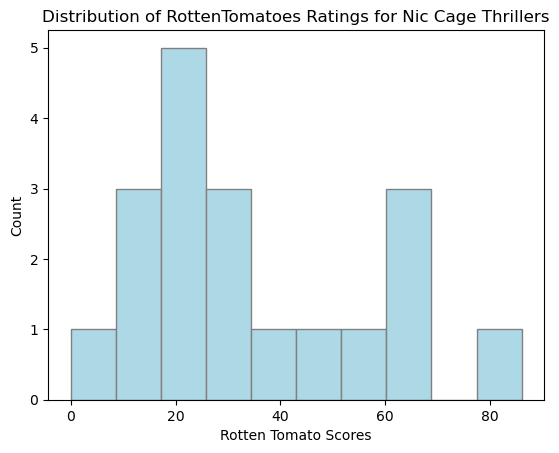

In [34]:
thrilltom= nic[nic.Genre == 'Thriller'].RottenTomatoes
plt.hist(thrilltom, color = "lightblue", ec="grey")
plt.xlabel('Rotten Tomato Scores')
plt.ylabel('Count')
plt.title('Distribution of RottenTomatoes Ratings for Nic Cage Thrillers')

Note

An early look at the distribution shows that Nic has some alarmingly low ratings for his thrillers! Let's see if there's equal variance between the drama ratings and thriller ratings.

In [35]:
print('Variance for Drama ratings:')
print(dramatom.var())
print('Variance for Trhiller ratings:')
print(thrilltom.var())

Variance for Drama ratings:
608.0105263157897
Variance for Trhiller ratings:
504.0058479532164


In [36]:
a= 0.05
t, p_value = stats.ttest_ind(nic[nic.Genre == 'Drama'].RottenTomatoes.dropna(), nic[nic.Genre == 'Thriller'].RottenTomatoes.dropna())
print(f"T-statistic: {t:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value/2 < a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

T-statistic: 4.149
P-value: 0.000
We reject the null hypothesis


Question 3

Do Cage's later films get better or worse ratings than the earlier films?

Null Hypothesis: Cage's films in the last decade recieve lower RT scores than his earlier works. Hypothesis: Cage's films in the last decade recieve higher RT scores than his earlier works.

Text(0.5, 1.0, 'Distribution of Cage Films with RT Score of 85+')

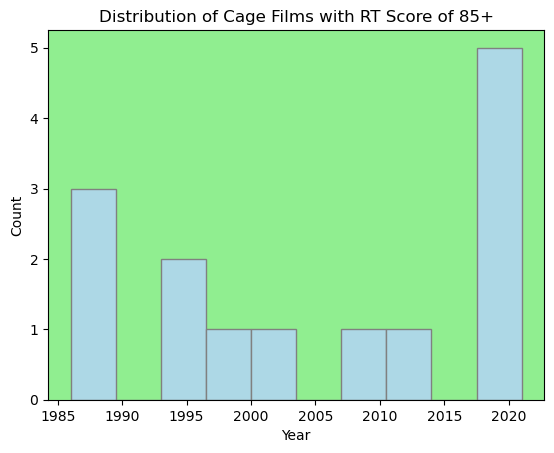

In [37]:
ax = plt.axes()
ax.set_facecolor("lightgreen")
ax.ticklabel_format(style='plain')
nic[nic.RottenTomatoes >= 85].Year.hist(color = "lightblue", ec="grey")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Cage Films with RT Score of 85+')


Text(0.5, 1.0, 'Distribution of Cage Films with RT Score of Less Than 85')

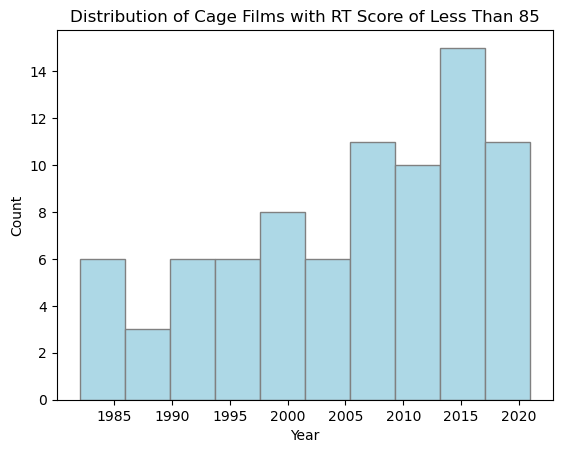

In [38]:
nic[nic.RottenTomatoes < 85].Year.hist(color = "lightblue", ec="grey")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Cage Films with RT Score of Less Than 85')

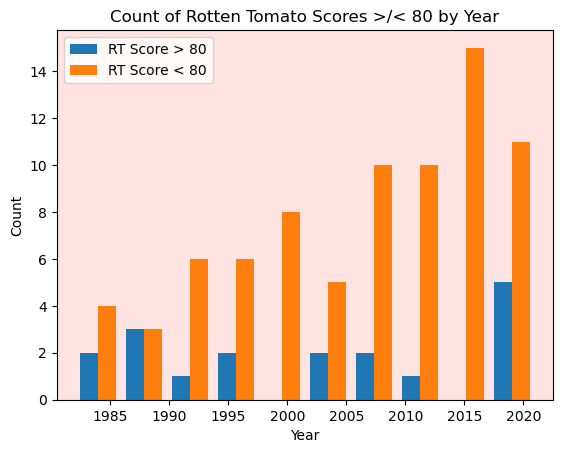

In [39]:
# Keeping this one 
ax = plt.axes()
ax.set_facecolor("mistyrose")
ax.ticklabel_format(style='plain')
plt.style.use('seaborn-deep')

x = nic[nic.RottenTomatoes > 80].Year
y = nic[nic.RottenTomatoes < 80].Year
plt.yticks
plt.hist([x, y], label=['RT Score > 80','RT Score < 80'])
plt.legend(loc='upper left')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Rotten Tomato Scores >/< 80 by Year')
plt.show()

In [40]:
def high_rt_chart(df):
    """ This function returns a histogram of Rotten Tomato scores over and under 80 measured against the decades long
        career of Nicolas Cage."""
    ax = plt.axes()
    ax.set_facecolor("mistyrose")
    ax.ticklabel_format(style='plain')
    plt.style.use('seaborn-deep')

    x = nic[nic.RottenTomatoes > 80].Year
    y = nic[nic.RottenTomatoes < 80].Year
    plt.yticks
    plt.hist([x, y], label=['RT Score > 80','RT Score < 80'])
    plt.legend(loc='upper left')

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Count of Rotten Tomato Scores >/< 80 by Year')
    plt.show()

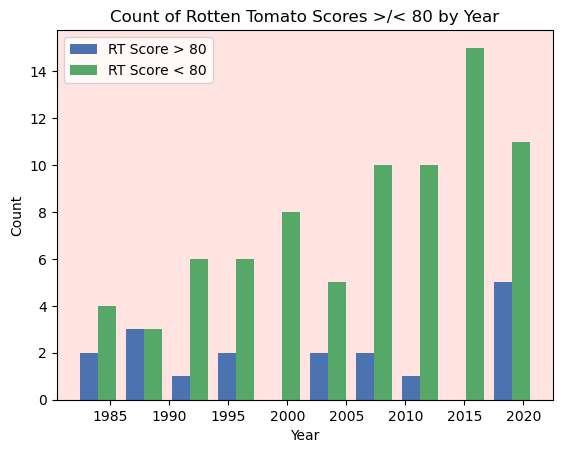

In [41]:
high_rt_chart(nic)

Notes

I'll keep this vis, but it's not telling me exactly what I want to know. I want to know if the last decade of film making (2011-2021) have seen significant improvement in Cage's film ratings compared to his overall average score. To determine that, I need to establish a baseline mean to measure the last 10 years against.

In [42]:
%%html
<div class='tableauPlaceholder' id='viz1683303044446' style='position: relative'><noscript><a href='#'><img alt='Distribution of Rotten Tomato Scores by Year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_w_genre&#47;rt_dist&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;nic_cage_w_genre&#47;rt_dist?:language=en-US&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_w_genre&#47;rt_dist&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1683303044446');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [44]:
# This will return all of the movies made after 2011 with RT scores over 80
rog =  nic[(nic.Year >=2011) & (nic.RottenTomatoes >=80)]
# This will return all of the movies recorded with RT scores over 80
ham = nic[(nic.Year <2021) & (nic.RottenTomatoes >=80)]

In [45]:
rog

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
65,Joe,R,Joe,0,2013,86.0,373375,Thriller,3,2
84,Spider-Man: Into the Spider-Verse,PG,Spider-Man Noir,1,2018,97.0,375464627,Family,1,4
86,Teen Titans Go! To the Movies,PG,Superman,1,2018,91.0,52090236,Family,1,4
89,Mandy,NR,Red Miller,0,2018,90.0,1474224,Horror,4,6
94,Color Out of Space,NR,Nathan,0,2019,86.0,1067417,Sci/Fi,4,7
98,Pig,R,Robin Feld,0,2021,97.0,3875079,Drama,3,1


In [46]:
ham.sort_values(by='Year', ascending=True).head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5
4,Birdy,R,Al Columbato,0,1984,83.0,1400000,Drama,3,1
7,Peggy Sue Got Married,PG-13,Charlie Bodell,0,1986,86.0,41382841,RomCom,2,5
9,Moonstruck,PG,Ronny Cammareri,0,1987,94.0,80642215,Drama,1,1
10,Raising Arizona,PG-13,H.I. McDunnough,0,1987,91.0,22847660,Drama,2,1


In [47]:
print(f'Variance of high RT Scores for last decade: {rog.RottenTomatoes.var()}'),
print(f'Variance of all time high RT Scores: {ham.RottenTomatoes.var()}')

Variance of high RT Scores for last decade: 24.566666666666663
Variance of all time high RT Scores: 20.720588235294116


In [48]:
rog.RottenTomatoes.mean()


91.16666666666667

In [49]:
ham.RottenTomatoes.mean()

88.70588235294117

In [50]:
print(f'Number of Films made after 2010 with RT scores of 80 and above: {rog.RottenTomatoes.count()}')
print(f'Number of Films made since 1983 with RT scores of 80 and above: {ham.RottenTomatoes.count()}')
print(f'Average High RT score for post-2010 films: {round(rog.RottenTomatoes.mean(),2)}')
print(f'Average High RT score for all films: {round(ham.RottenTomatoes.mean(),2)}')

Number of Films made after 2010 with RT scores of 80 and above: 6
Number of Films made since 1983 with RT scores of 80 and above: 17
Average High RT score for post-2010 films: 91.17
Average High RT score for all films: 88.71


In [51]:
# I want to take a quick look at how the overall RT score averages compare for my post-2010 and all time groups/ no longer 
# controlling for scores above 80
print(f'Average Rotten Tomato Score for post-2010 films: {nic[nic.Year >2011].RottenTomatoes.mean()}')
print(f'Average Rotten Tomato Score for all films: {nic[nic.Year >1982].RottenTomatoes.mean()}')

Average Rotten Tomato Score for post-2010 films: 42.05714285714286
Average Rotten Tomato Score for all films: 47.31578947368421


In [52]:
type(rog.RottenTomatoes), type(ham)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [53]:
stat, p =stats.f_oneway(rog.RottenTomatoes, ham.RottenTomatoes)
stat,p

(1.241183561849456, 0.2778321777424395)

**Observations**

After computing for variance, I've determined that this data is non-parametric. I can't use a t-test to analyze the relationship between my data, but a Mann-Whitney test is built to measure non-parametric data. Let's see if we have better luck with that.

In [54]:
from scipy.stats import mannwhitneyu
stat, p =mannwhitneyu(rog.RottenTomatoes, ham.RottenTomatoes)
stat, p

(64.5, 0.35537398856023816)

#### Notes

Even though the average score for post-2010 films is higher overall **and** when controlling for high RT scores, I don't have enough evidence to support my hypothesis. I believe that is because there simply haven't been enough films made in the last 10-year window. Perhaps after a few more years, I can revisit this dataset with more recent films and see if my hypothesis is proven then.

### MODELING
### Can We Predict Future RottenTomatoes Ratings based on our current data?

Features kept for modeling:
Genre_num
Rating_num


In [55]:
# make a copy of df
nic_hi = nic

nic['High_RT'] = (nic.RottenTomatoes >=80).astype(int)

In [56]:
nic_hi['High_RT']

0      0
1      0
2      0
3      1
4      1
      ..
96     0
97     0
98     1
99     0
100    0
Name: High_RT, Length: 101, dtype: int64

In [163]:
def high_rt(nic):
    """ This function creates a new column that will return a 0 or 1 based on whether a film has a high Rotten Tomatoes score"""
    nic['High_RT'] = (nic.RottenTomatoes >=80).astype(int)
    
    return nic

In [58]:
nic.isna().sum()

Movie             0
Rating            0
Character         0
Voice             0
Year              0
RottenTomatoes    5
Earnings          0
Genre             0
Rating_num        0
Genre_num         0
High_RT           0
dtype: int64

In [164]:
nic = high_rt(nic)
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num,High_RT
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5,0
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1,0
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5,1
4,Birdy,R,Al Columbato,0,1984,83.0,1400000,Drama,3,1,1
5,The Cotton Club,R,Vincent Dwyer,0,1984,77.0,25928721,Crime,3,0,0


In [60]:
nic= nic.dropna()

In [61]:
nic.isna().sum()

Movie             0
Rating            0
Character         0
Voice             0
Year              0
RottenTomatoes    0
Earnings          0
Genre             0
Rating_num        0
Genre_num         0
High_RT           0
dtype: int64

### Split 

In [62]:
def split_cage(df, target):
    '''
    take in a DataFrame return train, validate, test split on wine DataFrame.
    '''
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, val = train_test_split(train, test_size=.30, random_state=123, stratify=train[target])
    
    X_train, y_train = train.drop(columns=['Movie', 'Rating','Character', 'Year',
       'Earnings', 'Genre', 'High_RT']), train['High_RT']
    X_val, y_val = val.drop(columns=['Movie', 'Rating','Character', 'Year',
       'Earnings', 'Genre','High_RT']), val['High_RT']
    X_test, y_test = test.drop(columns=['Movie', 'Rating','Character', 'Year',
       'Earnings', 'Genre','High_RT']), test['High_RT']
    return X_train, X_val, X_test, y_train, y_val, y_test

In [63]:
X_train, X_val, X_test, y_train, y_val, y_test = split_cage(nic,'High_RT')

In [64]:
# X_train, y_train = train.drop(columns=['Movie', 'Rating','Character', 'Year',
#        'Earnings', 'Genre', 'High_RT']), train['High_RT']
# X_val, y_val = val.drop(columns=['Movie', 'Rating','Character', 'Year',
#        'Earnings', 'Genre','High_RT']), val['High_RT']
# X_test, y_test = test.drop(columns=['Movie', 'Rating','Character', 'Year',
#        'Earnings', 'Genre','High_RT']), test['High_RT']

In [65]:
X_train.head()

,Voice,RottenTomatoes,Rating_num,Genre_num
2,0,74.0,3,1
75,0,17.0,3,0
77,0,49.0,4,2
38,0,91.0,3,1
30,0,41.0,3,3


In [66]:
# Establishing my baseline
baseline = y_train.mode()
baseline_acc= round((y_train == 0).mean(),2)

print(baseline)
print(baseline_acc)

0    0
Name: High_RT, dtype: int64
0.81


In [67]:
def dt__comp_train_test(X_train, y_train, X_val, y_val): 
    christmas=[]
    for i in range(1,15):
        # make the thing
        tree=DecisionTreeClassifier(max_depth= i, random_state= 123)
        # fit the thing 
        tree.fit(X_train, y_train)
        # use the thing to evaluate model performance
        out_of_sample= tree.score(X_val, y_val)
        in_sample=tree.score(X_train, y_train)
        difference= round((in_sample - out_of_sample) * 100,2)

        #labeling columns for table
        heads= {'max_depth': {i}, 
                'train_accuracy' : in_sample,
                'val_accuracy' : out_of_sample,
                'Percentage Difference' : difference}
        christmas.append(heads)
    willow = pd.DataFrame(christmas)
    return willow

In [68]:
dt__comp_train_test(X_train, y_train, X_val, y_val)

,max_depth,train_accuracy,val_accuracy,Percentage Difference
0,{1},1.0,1.0,0.0
1,{2},1.0,1.0,0.0
2,{3},1.0,1.0,0.0
3,{4},1.0,1.0,0.0
4,{5},1.0,1.0,0.0
5,{6},1.0,1.0,0.0
6,{7},1.0,1.0,0.0
7,{8},1.0,1.0,0.0
8,{9},1.0,1.0,0.0
9,{10},1.0,1.0,0.0


In [69]:
def rt_multi_val(X_train, y_train, X_val, y_val):
    """This function takes in the train and test datasets and computes their respective
    accuracy scores and the difference between those scores when the max_depth and min_samples
    are changed"""
    little_john=[]
    # set range for max_Depth starting at 1, up to 15, counting by 2
    for i in range(1,15,2):
    # set range forin_samples starting at 3, up to 20, counting by 3
        for x in range(3,20,3):
    # fit a Random Forest classifier
            sherwood = RandomForestClassifier(max_depth= i, min_samples_leaf= x, random_state=123)

            rftestfit = sherwood.fit(X_train, y_train)

    # make predictions on the test set
            rftest_pred = sherwood.predict(X_train)

    # calculate model scores
            val_score = sherwood.score(X_val, y_val)
            train_score= sherwood.score(X_train, y_train)
            difference = round((train_score - val_score) * 100, 2)

            labels = {'max_depth': i,
                           'min_samples_leaf': x,
                           'Train Accuracy': train_score,
                           'Validate Accuracy': val_score,
                           'Percentage Difference': difference
                           }
    # create df that measures train score, test score, and the difference between them
            little_john.append(labels)
    return pd.DataFrame(little_john)

In [70]:
rt_multi_val(X_train, y_train, X_val, y_val)

,max_depth,min_samples_leaf,Train Accuracy,Validate Accuracy,Percentage Difference
0,1,3,0.943396,0.869565,7.38
1,1,6,0.811321,0.826087,-1.48
2,1,9,0.811321,0.826087,-1.48
3,1,12,0.811321,0.826087,-1.48
4,1,15,0.811321,0.826087,-1.48
5,1,18,0.811321,0.826087,-1.48
6,3,3,1.000000,1.000000,0.00
7,3,6,1.000000,1.000000,0.00
8,3,9,0.811321,0.826087,-1.48
9,3,12,0.811321,0.826087,-1.48


In [71]:
def rfmodel(X_train, y_train, X_val, y_val):
# fit a Random Forest classifier
    sherwood = RandomForestClassifier(max_depth= 1, min_samples_leaf= 3, random_state=123)

    rftestfit = sherwood.fit(X_train, y_train)

# make predictions on the test set
    rftest_pred = sherwood.predict(X_train)

# calculate model scores
    val_score = sherwood.score(X_val, y_val)
    train_score= sherwood.score(X_train, y_train)
    difference = round((train_score - val_score) * 100, 2)

    labels = pd.DataFrame(data=[{'model': 'RandomForest',
                   'Train Accuracy': train_score,
                   'Validate Accuracy': val_score,
                   'Percentage Difference': difference
                   }])
    return labels

In [72]:
rfmodel(X_train, y_train, X_val, y_val)

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,RandomForest,0.943396,0.869565,7.38


In [73]:
def knn_multi_val(X_train, y_train, X_val, y_val):
    """This function takes in the train and test datasets and computes their respective
    accuracy scores and the difference between those scores when the number of neighbors is
    changed"""
    wont_you_be=[]
    # set range for n_neighbors starting at 5, up to 25
    for i in range(5,25):
    # fit a KNN classifier
            nextdoor = KNeighborsClassifier(n_neighbors= i)

            nextdoor.fit(X_train, y_train)

    # make predictions on the test set
            y_pred = nextdoor.predict(X_train)

    # calculate model scores
            val_score = nextdoor.score(X_val, y_val)
            train_score= nextdoor.score(X_train, y_train)
            difference = round((train_score - val_score) * 100, 2)

            labels = {'n_neighbors': i,
                           
                           'Train Accuracy': train_score,
                           'Validate Accuracy': val_score,
                           'Percentage Difference': difference
                           }
    # create df that measures train score, test score, and the difference between them
            wont_you_be.append(labels)
            return pd.DataFrame(wont_you_be)



In [74]:
knn_multi_val(X_train, y_train, X_val, y_val)

,n_neighbors,Train Accuracy,Validate Accuracy,Percentage Difference
0,5,1.0,1.0,0.0


In [75]:
def knn_model(X_train, y_train, X_val, y_val):

    # fit a KNN classifier
    nextdoor = KNeighborsClassifier(n_neighbors= 24)

    nextdoor.fit(X_train, y_train)

# make predictions on the test set
    y_pred = nextdoor.predict(X_train)

# calculate model scores
    val_score = nextdoor.score(X_val, y_val)
    train_score= nextdoor.score(X_train, y_train)
    difference = round((train_score - val_score) * 100, 2)

    labels = pd.DataFrame(data=[{'model': 'KNN',
                   'Train Accuracy': train_score,
                   'Validate Accuracy': val_score,
                   'Percentage Difference': difference
                   }])
    return labels

In [76]:
knn_model(X_train, y_train, X_val, y_val)

,model,Train Accuracy,Validate Accuracy,Percentage Difference
0,KNN,0.811321,0.826087,-1.48


### Modeling Results

After testing a bunch of different models, only one- the RandomForest Classifier with max_depth= 1, min_samples_leaf= 3- returned a train and validate accuracy score that was higher than the baseline. However, most of my models were insignificant or inconclusive, which makes me apprehensive about trusting the results from this one. In the end, I have to admit that these metrics might not be useful in returning useful models. I'll return to this project in the future, and when I do, I'll try to measure for something else that can rely on more historical data.

### New plan! Reccomendation Model

Steps:

1. Vectorize the Dataframe
2. Build the System

In [135]:
df= nic
df.head(3)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num,High_RT
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5,0
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1,0
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5,1


In [136]:
df.head(3)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num,High_RT
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5,0
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1,0
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5,1


In [137]:
df2 = df.drop(['Character','Voice','Year','Earnings','Rating_num', 'Genre_num', 'High_RT'],axis=1)
# df2= df2.set_index('Movie')
df2['data'] = df2[df2.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)

print(df2['data'].head())

1    R 78.0 RomCom
2     R 74.0 Drama
3    R 83.0 RomCom
4     R 83.0 Drama
5     R 77.0 Crime
Name: data, dtype: object


In [138]:
df2.head()

,Movie,Rating,RottenTomatoes,Genre,data
1,Fast Times at Ridgemont High,R,78.0,RomCom,R 78.0 RomCom
2,Rumble Fish,R,74.0,Drama,R 74.0 Drama
3,Valley Girl,R,83.0,RomCom,R 83.0 RomCom
4,Birdy,R,83.0,Drama,R 83.0 Drama
5,The Cotton Club,R,77.0,Crime,R 77.0 Crime


In [155]:

print(df2['data'].head())

df.data.head():
1    R 78.0 RomCom
2     R 74.0 Drama
3    R 83.0 RomCom
4     R 83.0 Drama
5     R 77.0 Crime
Name: data, dtype: object


In [139]:
# Vectorizing df
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df2['data'])


In [140]:
# Applying cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(vectorized)

In [141]:
similarities

array([[1.        , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.5       , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.66666667,
        1.        ]])

In [142]:
# Apply similarities to my df
# Setting my movie titles as the index
df = pd.DataFrame(similarities, columns=df['Movie'], index=df['Movie']).reset_index()

df.head()

Movie,Movie,Fast Times at Ridgemont High,Rumble Fish,Valley Girl,Birdy,The Cotton Club,Racing with the Moon,Peggy Sue Got Married,The Boy in Blue,Moonstruck,...,Grand Isle,Primal,Running with the Devil,Color Out of Space,A Score to Settle,The Croods: A New Age,Jiu Jitsu,Pig,Willy's Wonderland,Prisoners of the Ghostland
0,Fast Times at Ridgemont High,1.0,0.0,0.5,0.0,0.0,0.000000,0.353553,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Rumble Fish,0.0,1.0,0.0,0.5,0.0,0.408248,0.000000,0.5,0.408248,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0
2,Valley Girl,0.5,0.0,1.0,0.5,0.0,0.000000,0.353553,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Birdy,0.0,0.5,0.5,1.0,0.0,0.408248,0.000000,0.5,0.408248,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.0
4,The Cotton Club,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,0.0,0.0


In [157]:
print(nic.head())

                          Movie Rating      Character  Voice  Year  \
1  Fast Times at Ridgemont High      R     Brad's Bud      0  1982   
2                   Rumble Fish      R         Smokey      0  1983   
3                   Valley Girl      R          Randy      0  1983   
4                         Birdy      R   Al Columbato      0  1984   
5               The Cotton Club      R  Vincent Dwyer      0  1984   

   RottenTomatoes  Earnings   Genre  Rating_num  Genre_num  High_RT  
1            78.0  27093116  RomCom           3          5        0  
2            74.0   2494480   Drama           3          1        0  
3            83.0  16800000  RomCom           3          5        1  
4            83.0   1400000   Drama           3          1        1  
5            77.0  25928721   Crime           3          0        0  


In [144]:
# input('What film did you enjoy?')

In [158]:
flick = input('What film did you enjoy?')
recommendations = pd.DataFrame(df.nlargest(3,flick)['Movie'])
recommendations = recommendations[recommendations['Movie']
                                  !=flick]
print(f'''If you enjoyed "{flick}", you might enjoy: 
{recommendations}''')

What film did you enjoy? The Croods


If you enjoyed "The Croods", you might enjoy: 
                         Movie
33  Christmas Carol: The Movie
39           National Treasure


In [161]:
def suggestion(df):
    df.head(3)
    df2 = df.drop(['Character','Voice','Year','Earnings','Rating_num', 'Genre_num', 'High_RT'],axis=1)
    # df2= df2.set_index('Movie')
    df2['data'] = df2[df2.columns[1:]].apply(
        lambda x: ' '.join(x.dropna().astype(str)),
        axis=1)
    # print('df.data.head():')
    # print(df2['data'].head())

    # Vectorize DF
    vectorizer = CountVectorizer()
    vectorized = vectorizer.fit_transform(df2['data'])

    # Applying cosine similarity
    similarities = cosine_similarity(vectorized)
    # print(f'Array of cosine similarities:{similarities}')

    # Apply similarities to my df
    # Setting my movie titles as the index
    df = pd.DataFrame(similarities, columns=df['Movie'], index=df['Movie']).reset_index()
    # print(df.head())

    flick = input('What film did you enjoy?')
    recommendations = pd.DataFrame(df.nlargest(3,flick)['Movie'])
    recommendations = recommendations[recommendations['Movie']
                                    !=flick]
    print(f'''If you enjoyed "{flick}", you might enjoy: 
    {recommendations}''')

In [162]:
suggestion(nic)

What film did you enjoy? Pig


If you enjoyed "Pig", you might enjoy: 
             Movie
1  Rumble Fish
3        Birdy


In [ ]:
# ### Can't use this now. Running out of time, but will come back to make drop down 
# #   menu for reccomendations


# # Import module
# from tkinter import *

# # Create object
# root = Tk()

# # Adjust size
# root.geometry( "200x200" )

# # Change the label text
# def show():
# 	label.config( text = clicked.get() )

# # Dropdown menu options
# options = []

# # datatype of menu text
# clicked = StringVar()

# # initial menu text
# clicked.set( "Movie" )

# # Create Dropdown menu
# drop = OptionMenu( root , clicked , *options )
# drop.pack()

# # Create button, it will change label text
# button = Button( root , text = "click Me" , command = show ).pack()

# # Create Label
# label = Label( root , text = " " )
# label.pack()

# # Execute tkinter
# root.mainloop()
